In [1]:
import numpy as np

import itertools

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def left(x, y):
    return x-1, y

def right(x, y):
    return x+1, y

def up(x, y):
    return x, y + 1

def down(x, y):
    return x, y - 1

def stay(x, y):
    return x, y

In [3]:
class Cell(object):
    def __init__(self, actions, default_value = 0.):
        self.actions = {a:0. for a in actions}
        self.update_policy()
        self.value = default_value

    def update_policy(self):
        self.policy = max(self.actions.items(), key = lambda p: p[1])[0]


class Grid(object):
    def __init__(self, dim=10, default_value=0.):
        self.dim = dim
        
        self.data = np.array([[None for _ in range(dim)] for _ in range(dim)])
        
        for x in range(1, dim - 1):
            for y in range(1, dim - 1):
                self.data[x][y] = Cell([left, right, up, down], default_value=default_value)
                
        for x in range(1, dim - 1):
            self.data[x][0] = Cell([left, right, up], default_value=default_value)
            self.data[x][dim - 1] = Cell([left, right, down], default_value=default_value)
            
        for y in range(1, dim - 1):
            self.data[0][y] = Cell([right, up, down], default_value=default_value)
            self.data[dim - 1][y] = Cell([left, up, down], default_value=default_value)
            
        self.data[0][0] = Cell([up, right], default_value=default_value)
        self.data[dim-1][dim-1] = Cell([stay], default_value=100.)
        self.data[0][dim - 1] = Cell([right, down], default_value=default_value)
        self.data[dim - 1][0] = Cell([left, up], default_value=default_value)
        
        self.data[dim - 1][dim - 2].actions[up] = 100.
        self.data[dim - 2][dim - 1].actions[right] = 100.
        
        self.data[dim - 1][dim - 2].update_policy()
        self.data[dim - 2][dim - 1].update_policy()
        
    def best_path(self):
        path = list()
        x, y = 0, 0
                
        while not(x == self.dim - 1 and y == self.dim - 1):
            path.append((x, y))
            x, y = self.data[x, y].policy(x, y)
        
        path.append((x, y))
        return path
                
        

In [4]:
def iter_values(grid, theta, disc):
    def eval():
        delta = -1.
        for x in range(grid.dim):
            for y in range(grid.dim):
                c = grid.data[x, y]
                
                prev, act = c.value, c.policy
                c.value = c.actions[act] + disc*grid.data[act(x, y)].value
                delta = max(prev, abs(prev - c.value))
                
        return delta
            
    
    n_iters = 0
    
    while eval() >= theta:
        n_iters += 1
        
    return n_iters


def iter_policies(grid, theta, disc):
    print(theta, disc)
    improving = True
    n_iters = 0

    while improving:
        improving = False
        iter_values(grid, theta, disc)
        
        for x in range(grid.dim):
            for y in range(grid.dim):
                c = grid.data[x, y]
                best_policy = c.policy
                
                delta = -100500.
                for act, reward in c.actions.items():
                    q = reward + disc*grid.data[act(x, y)].value
                    
                    if q > delta:
                        delta, best_policy = q, act
                
                if best_policy != c.policy:
                    c.policy, improving = best_policy, True
    
        n_iters += 1
    
    return n_iters

In [5]:
g = Grid(10)
theta, disc = 1., 0.8
iters_required = iter_policies(g, theta, disc)
print(iters_required)

1.0 0.8
17


In [6]:
theta_vals = np.linspace(0.1, 5., 20)

iters_list = [iter_values(Grid(10), t, 0.8) for t in theta_vals]

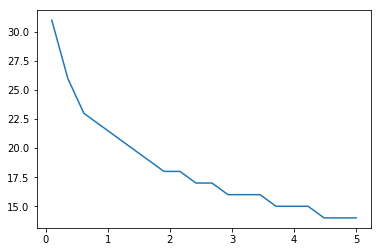

In [7]:
plt.plot(theta_vals, iters_list)